<a href="https://colab.research.google.com/github/Parul-Mann/Evolutionary-Computing-PSO-LSTM/blob/main/Copy_of_G10__FungiClassification_LSTM_PSO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing pyswarm library for PSO

In [ ]:
!pip install pyswarm

Importing libraries and models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyswarm import pso
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

List of features

In [ ]:
names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
         "gill-attachment", "gill-spacing", "gill-size", "gill-color",
         "stalk-shape", "stalk-root", "stalk-surface-above-ring",
         "stalk-surface-below-ring", "stalk-color-above-ring",
         "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
         "ring-type", "spore-print-color", "population", "habitat"]

Defining a dataframe

In [ ]:
df = pd.read_csv(url, header=None, names=names)

Conversion of variables (Categorical to Numerical)

In [ ]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

Data Preparation

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

X_padded = pad_sequences(X.values, maxlen=X.shape[1])

Splitting the dataset into training set and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

Setting random hyperparameters for DL Model

In [ ]:
embedding_output_dim = np.random.randint(10, 100)
lstm_units = np.random.randint(10, 200)
dense_units = np.random.randint(10, 500)
batch_size = np.random.randint(32, 728)
epochs_before = np.random.randint(5, 20)

Building the LSTM Deep Learning Model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(df.columns), output_dim=embedding_output_dim, input_length=X_padded.shape[1]))
model.add(LSTM(lstm_units))
model.add(Dense(dense_units, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model

In [ ]:
history_before = model.fit(X_train, y_train, epochs = epochs_before, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

Epoch 1/8
9/9 [==============================] - 6s 71ms/step - loss: 0.7565 - accuracy: 0.4984 - val_loss: 0.7107 - val_accuracy: 0.5188
Epoch 2/8
9/9 [==============================] - 0s 15ms/step - loss: 0.7099 - accuracy: 0.5178 - val_loss: 0.6888 - val_accuracy: 0.5188
Epoch 3/8
9/9 [==============================] - 0s 17ms/step - loss: 0.6848 - accuracy: 0.5084 - val_loss: 0.6759 - val_accuracy: 0.4812
Epoch 4/8
9/9 [==============================] - 0s 14ms/step - loss: 0.6180 - accuracy: 0.7130 - val_loss: 0.5154 - val_accuracy: 0.8228
Epoch 5/8
9/9 [==============================] - 0s 15ms/step - loss: 0.3890 - accuracy: 0.8640 - val_loss: 0.3242 - val_accuracy: 0.8806
Epoch 6/8
9/9 [==============================] - 0s 13ms/step - loss: 0.3115 - accuracy: 0.8883 - val_loss: 0.3174 - val_accuracy: 0.8837
Epoch 7/8
9/9 [==============================] - 0s 13ms/step - loss: 0.2686 - accuracy: 0.8997 - val_loss: 0.2552 - val_accuracy: 0.9028
Epoch 8/8
9/9 [===================

Model Evaluation

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy: %.2f%%" % (accuracy * 100))

51/51 [==============================] - 1s 3ms/step

Model Accuracy: 90.58%


Plotting the Accuracy Variation for the model

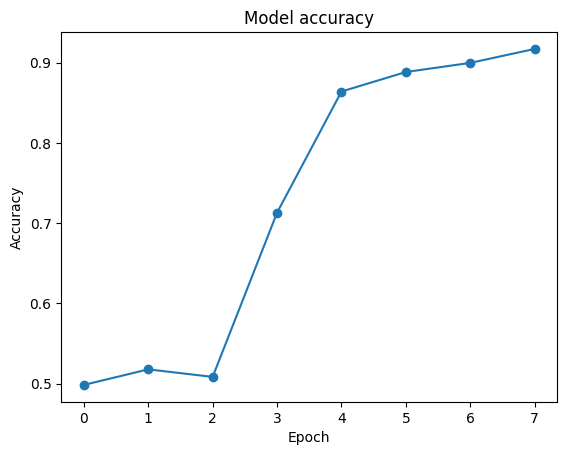

In [ ]:
plt.plot(history_before.history['accuracy'], marker='o')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Defining the Objective Function that builds, trains and evaluates the model. It returns a negative accuracy as the PSO Algorithm minimizes the Objective Function.

In [ ]:
def objective(hyperparameters):
    embedding_output_dim, lstm_units, dense_units, batch_size, epochs = hyperparameters

    # Building
    model = Sequential()
    model.add(Embedding(input_dim=len(df.columns), output_dim=int(round(embedding_output_dim)), input_length=X_padded.shape[1]))
    model.add(LSTM(int(round(lstm_units))))
    model.add(Dense(int(round(dense_units)), activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training
    history = model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), validation_data=(X_test, y_test), verbose=0)

    # Evaluation
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy

Defining the Hyperparameter Search Space in the order of embedding_output_dim, lstm_units, dense_units, batch_size and epochs

In [ ]:
lb = [16, 50, 50, 32, 5]
ub = [32, 100, 100, 64, 10]

Empty list for storing accuracy for plotting

In [ ]:
accuracy_list = []

Finding the best Hyperparameters using the PSO Algorithm

In [ ]:
for i in range(10):
    best_hyperparameters, _ = pso(objective, lb, ub, swarmsize=10, maxiter=1)
    accuracy_list.append(-objective(best_hyperparameters))

51/51 [==============================] - 0s 2ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 0s 2ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 0s 2ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 0s 3ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 1s 3ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 1s 3ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 0s 2ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 1s 3ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 0s 2ms/step
Stopping search: maximum iterations reached --> 1
51/51 [==============================] - 1s 3ms/step
Stopping search: max

Plotting the change in accuracy across all iterations

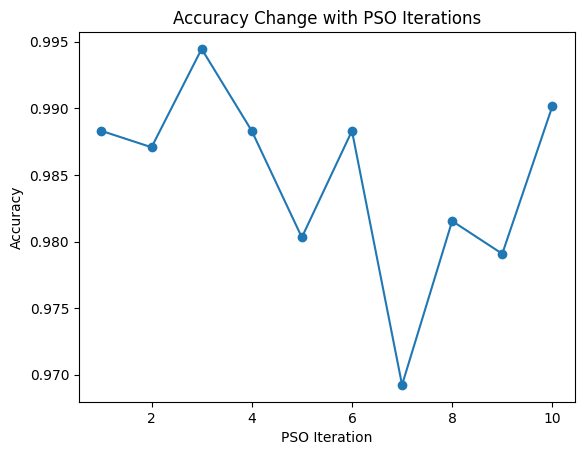

In [ ]:
iteration_list = list(range(1, len(accuracy_list) + 1))
plt.plot(iteration_list, accuracy_list, marker='o')
plt.xlabel('PSO Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Change with PSO Iterations')
plt.show()

List of best hyperparameters in the order of embedding_output_dim, lstm_units, dense_units, batch_size and epochs

In [ ]:
print("Best hyperparameters:", best_hyperparameters)

Best hyperparameters: [26.37304789 50.09642899 74.43006286 34.27380098  9.21523553]



Best hyperparameters obtained from PSO:

* embedding_output_dim = 26
* lstm_units = 50
* dense_units = 74
* batch_size = 34
* epochs = 9



Replacing the old Hyperparameters with the new Hyperparameters obtained from PSO

In [ ]:
embedding_output_dim = 26
lstm_units = 50
dense_units = 74
batch_size = 34
epochs_after = 9

Training the model with updated Hyperparameters

In [ ]:
history_after = model.fit(X_train, y_train, epochs = epochs_after, batch_size=batch_size, verbose=1)

Epoch 1/9
192/192 [==============================] - 2s 10ms/step - loss: 0.0333 - accuracy: 0.9911
Epoch 2/9
192/192 [==============================] - 2s 12ms/step - loss: 0.0047 - accuracy: 0.9983
Epoch 3/9
192/192 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 4/9
192/192 [==============================] - 1s 5ms/step - loss: 3.4503e-04 - accuracy: 1.0000
Epoch 5/9
192/192 [==============================] - 1s 5ms/step - loss: 1.8100e-04 - accuracy: 1.0000
Epoch 6/9
192/192 [==============================] - 1s 5ms/step - loss: 1.1695e-04 - accuracy: 1.0000
Epoch 7/9
192/192 [==============================] - 1s 6ms/step - loss: 8.3888e-05 - accuracy: 1.0000
Epoch 8/9
192/192 [==============================] - 1s 5ms/step - loss: 6.1400e-05 - accuracy: 1.0000
Epoch 9/9
192/192 [==============================] - 1s 5ms/step - loss: 4.8338e-05 - accuracy: 1.0000


Evaluation of the model with new Hyperparameters

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy: %.2f%%" % (accuracy * 100))


51/51 [==============================] - 0s 2ms/step

Model Accuracy: 100.00%


Plotting the Accuracy Variation for the tuned model

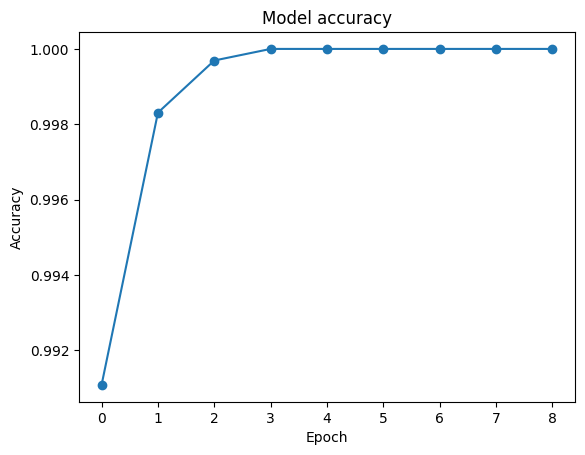

In [ ]:
plt.plot(history_after.history['accuracy'], marker='o')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Plotting Accuracy Variation before and after Hyperparameter Optimization using PSO

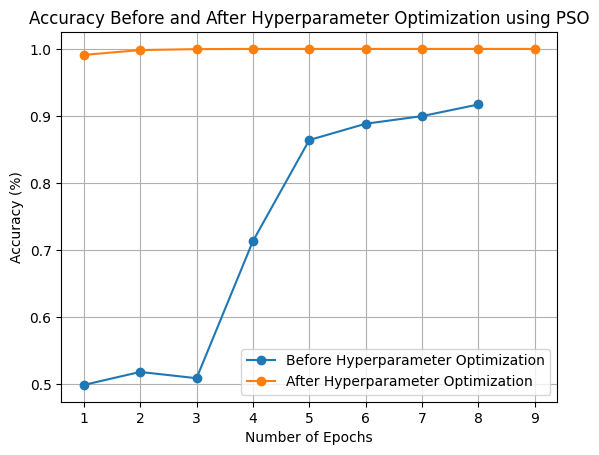

In [ ]:
e1 = [i for i in range(1, epochs_before + 1)]
e2 = [i for i in range(1, epochs_after + 1)]

plt.plot(e1, history_before.history['accuracy'], label='Before Hyperparameter Optimization', marker='o')
plt.plot(e2, history_after.history['accuracy'], label='After Hyperparameter Optimization', marker='o')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Before and After Hyperparameter Optimization using PSO')
plt.legend()
plt.grid(True)
plt.show()